In [1]:
 import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
crashes = pd.read_csv('traffic_crashes.csv')
crashes.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,1,REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,0,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,0,PARKED MOTOR VEHICLE,ONE-WAY,...,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,0,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,0,PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


In [3]:
crashes = crashes[["CRASH_DATE","TRAFFICWAY_TYPE", "ROADWAY_SURFACE_COND", "LIGHTING_CONDITION", "POSTED_SPEED_LIMIT", "ROAD_DEFECT", "MOST_SEVERE_INJURY", "INJURIES_FATAL", "DAMAGE", "CRASH_HOUR", "CRASH_TYPE"]].copy()
crashes.head()

,CRASH_DATE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,POSTED_SPEED_LIMIT,ROAD_DEFECT,MOST_SEVERE_INJURY,INJURIES_FATAL,DAMAGE,CRASH_HOUR,CRASH_TYPE
0,7/4/2019 22:33,DIVIDED - W/MEDIAN BARRIER,DRY,1,45,NO DEFECTS,NaN,0,1,22,0
1,7/30/2019 10:22,DIVIDED - W/MEDIAN (NOT RAISED),DRY,0,30,NO DEFECTS,NaN,0,1,10,0
2,8/10/2019 17:00,ONE-WAY,DRY,0,25,NO DEFECTS,NaN,0,0,17,0
3,8/16/2019 16:53,NOT DIVIDED,DRY,0,30,NO DEFECTS,NO INDICATION OF INJURY,0,0,16,0
4,8/17/2019 16:04,PARKING LOT,DRY,0,30,NO DEFECTS,NO INDICATION OF INJURY,0,0,16,0


In [43]:
x = crashes[["DAMAGE"]]
y = crashes["CRASH_TYPE"].values.reshape(-1,1)
print(x.shape, y.shape)

(350845, 1) (350845, 1)


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=25)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
testing_score = model.score(x_train, y_train)

print(training_score)
print(testing_score)

0.05249058972649168
0.05249058972649168


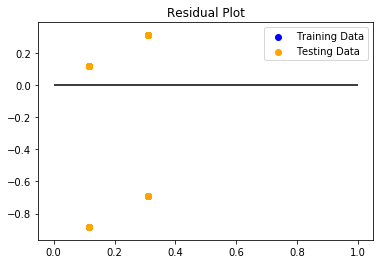

In [47]:
plt.scatter(model.predict(x_train), model.predict(x_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show
plt.savefig("Residual Plot Crash Hour and Crash Type vs. Speed Limit.png")

In [48]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)

In [49]:
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [50]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(x_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9589939617058292, R2: 0.036061124497871355


In [51]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = lasso.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(x_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9436480306896176, R2: 0.05148618458999931


In [52]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = ridge.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(x_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9436040911819464, R2: 0.05153035066539269


In [53]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(x_train_scaled, y_train_scaled)

predictions = elasticnet.predict(x_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(x_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9436071677464759, R2: 0.05152725823700278


In [54]:
from sklearn.linear_model import LassoCV

### BEGIN SOLUTION
lasso = LassoCV(cv=5).fit(x_train_scaled, y_train_scaled)

predictions = lasso.predict(x_test_scaled)
reg = LassoCV(cv=5, random_state=0).fit(x,y)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = reg.score(x, y)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9436028559863013, R2: 0.052254989827824616


In [55]:
from sklearn.linear_model import LassoLarsCV

### BEGIN SOLUTION
lasso = LassoLarsCV(cv=5).fit(x_train_scaled, y_train_scaled)

reg = LassoLarsCV(cv=5).fit(x,y)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = reg.score(x, y)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9436028559863013, R2: 0.0522550420828668
